## Kernel Function 

How two points in the in the input space are similar.
Most used kernel : Gaussian Kernel, it has a mean and a variance. 

### Python for Gaussian Processes 

We want to estimate a function that maps the bids to the number of clicks

Bid belongs to {0.10 -> 1.00} <b> Already normalized </b> 

We will generate the datapoints one at the time. 

In [39]:
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


def n(x):
    # The real function to estimate 
    return (1.0 - np.exp(-5.0 *x)) * 100

def generate_observation(x , noise_std):
    return n(x) + np.random.normal(0, noise_std, size = n(x).shape)

/home/gabriele/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/gabriele/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/gabriele/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn

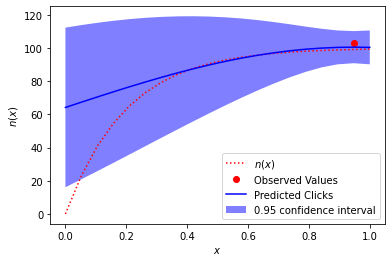

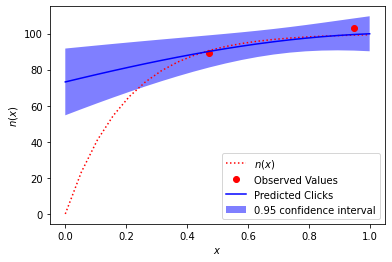

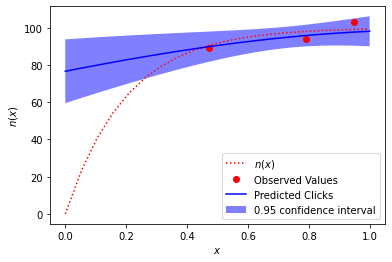

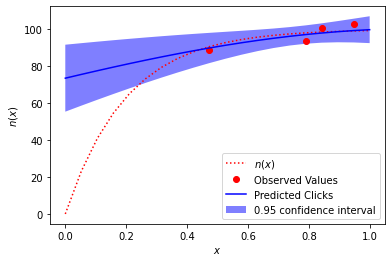

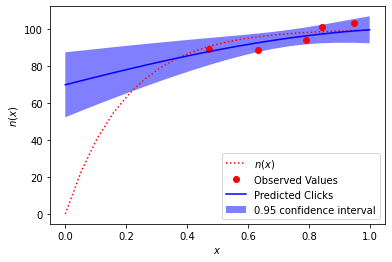

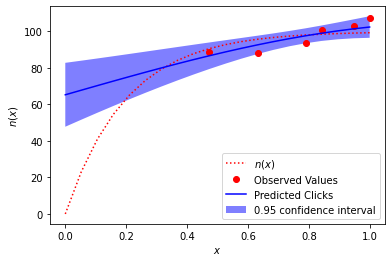

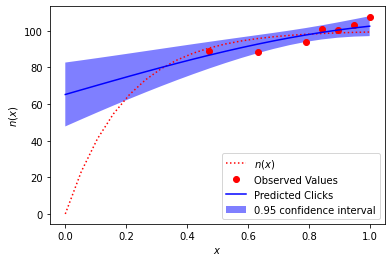

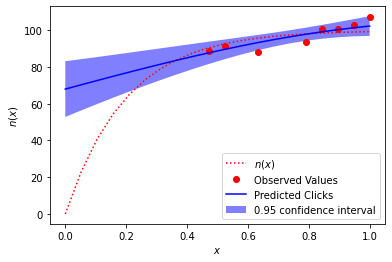

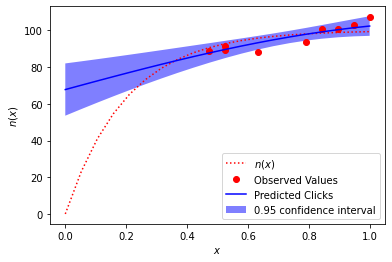

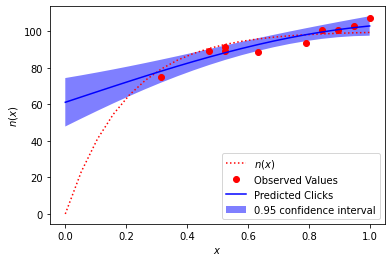

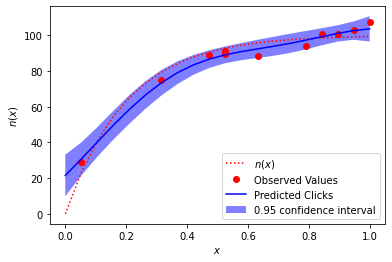

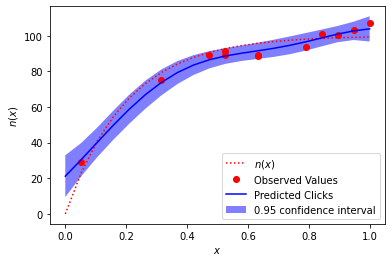

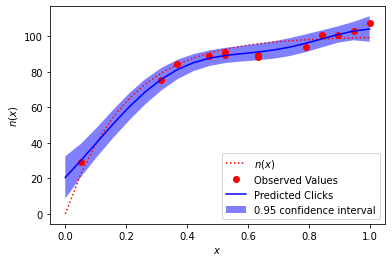

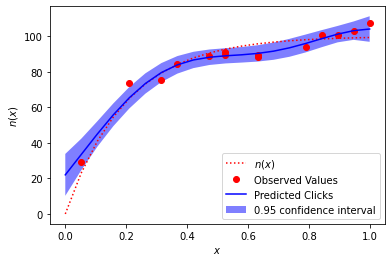

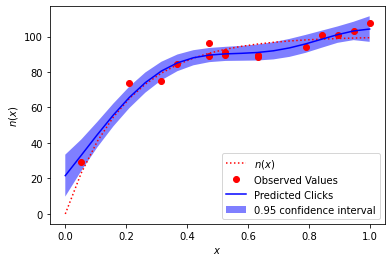

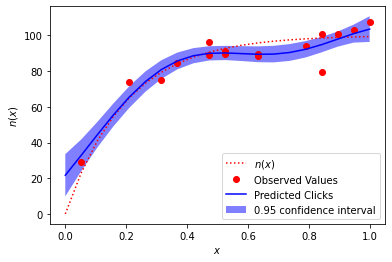

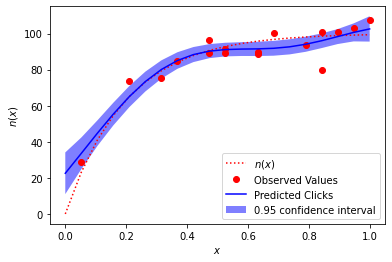

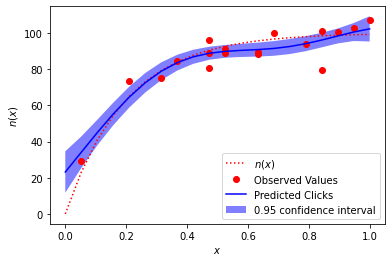

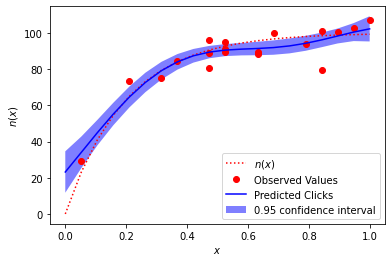

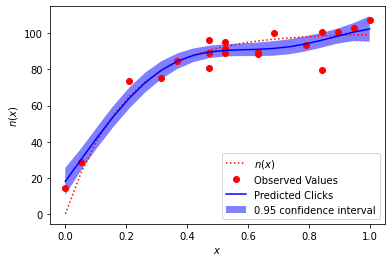

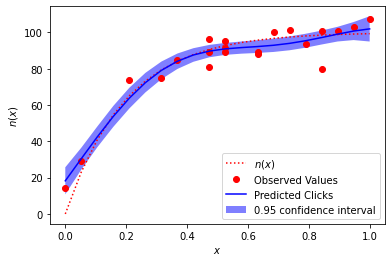

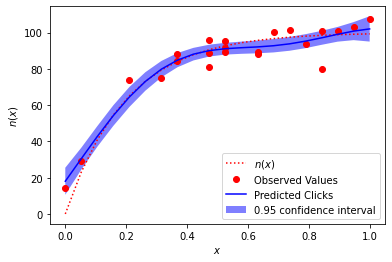

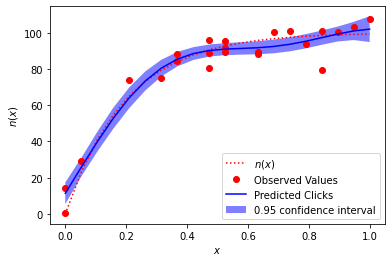

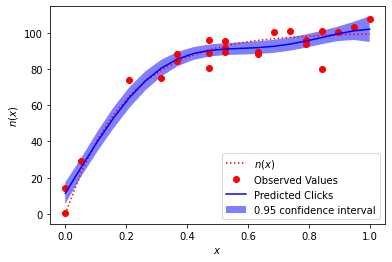

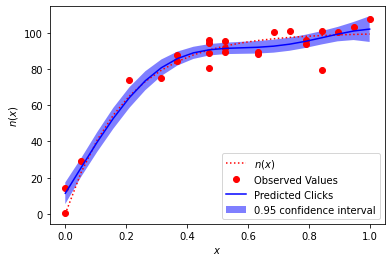

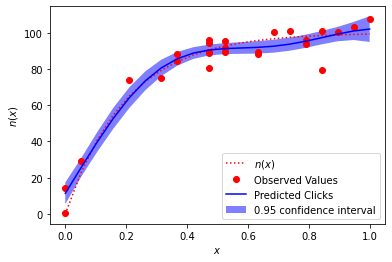

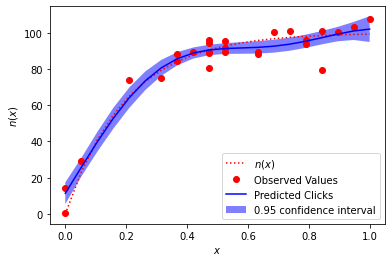

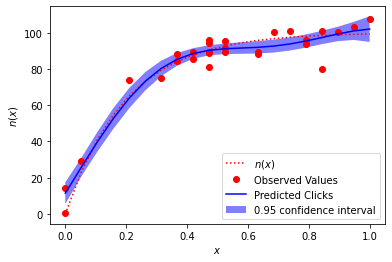

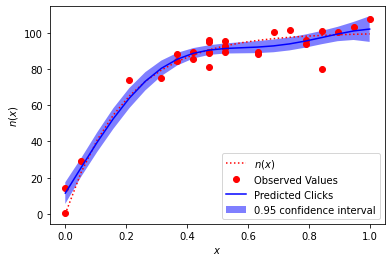

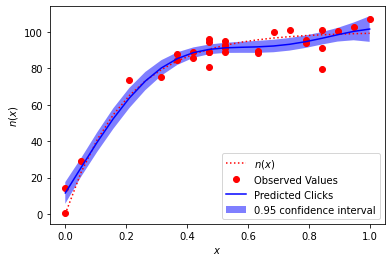

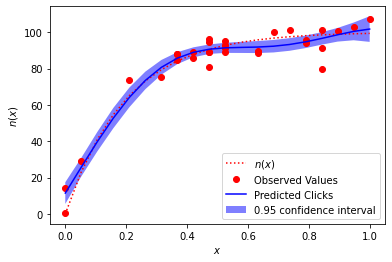

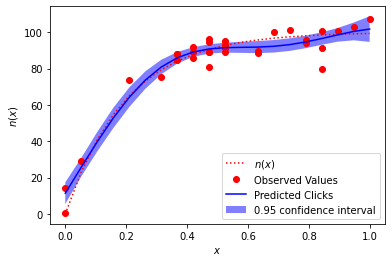

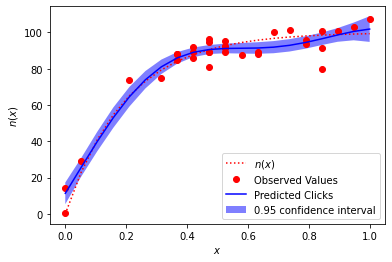

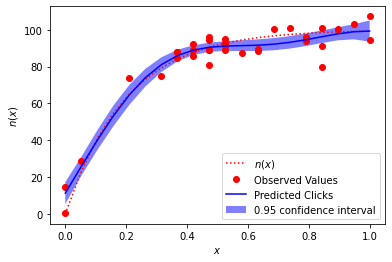

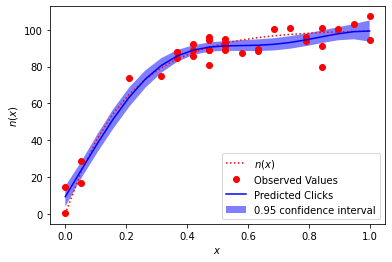

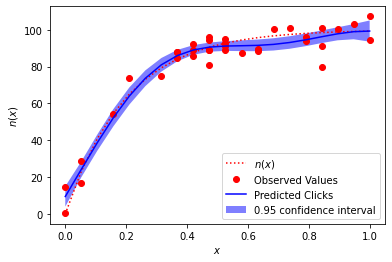

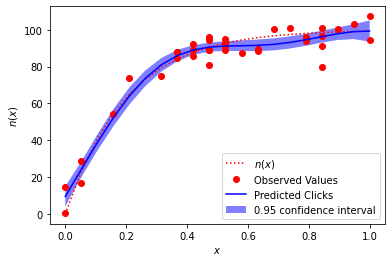

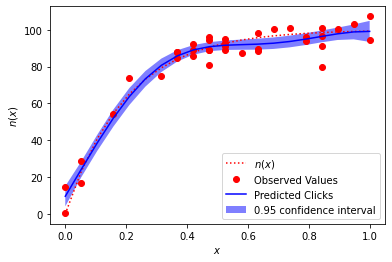

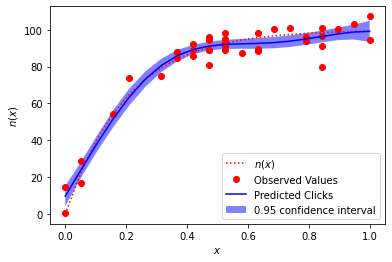

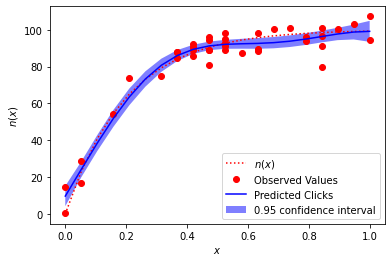

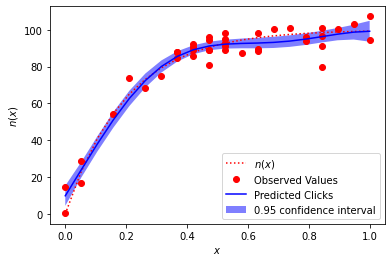

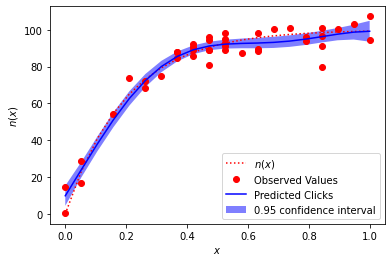

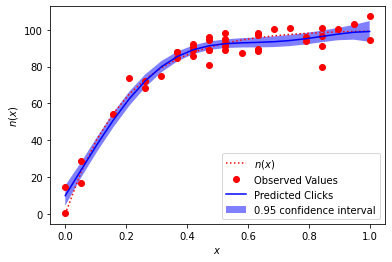

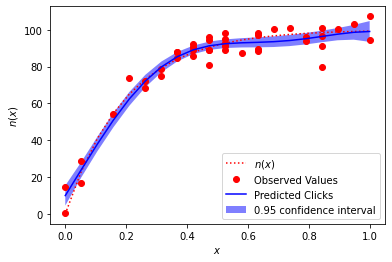

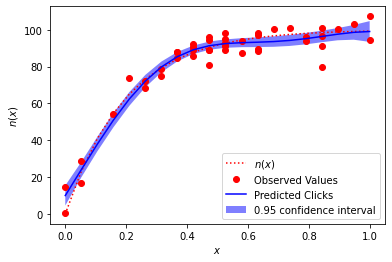

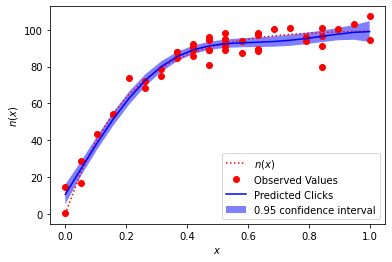

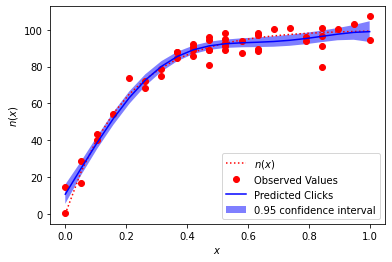

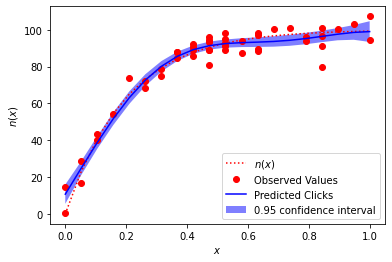

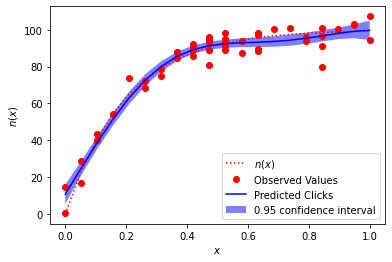

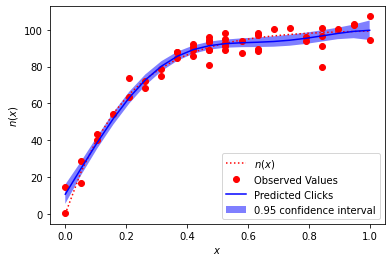

In [45]:
import imageio 
n_observation = 50 
bids = np.linspace(0.0, 1.0, 20)
x_observations = np.array([])
y_observations = np.array([])
noise_std = 5.0 
images = []  #To generate the final gif, it doesn't create automatically the folder GP_plots


for i in range(n_observation):

    new_x = np.random.choice(bids, 1)
    new_y = generate_observation(new_x , noise_std)

    x_observations = np.append(x_observations, new_x)
    y_observations = np.append(y_observations, new_y)

    X = np.atleast_2d(x_observations).T
    Y = y_observations.ravel()

    theta = 1.0
    l = 1.0
    kernel = C(theta, (1e-03, 1e3)) * RBF(1, (1e-3, 1e3)) 
    gp = GaussianProcessRegressor(kernel = kernel, alpha = noise_std**2, normalize_y = False, n_restarts_optimizer = 10)

    gp.fit(X,Y)

    x_pred = np.atleast_2d(bids).T
    y_pred, sigma = gp.predict(x_pred, return_std = True)

    plt.figure(i)
    plt.plot(x_pred, n(x_pred), 'r:', label = '$n(x)$')
    plt.plot(X.ravel(), Y, 'ro', label = 'Observed Values')
    plt.plot(x_pred, y_pred, 'b-', label = 'Predicted Clicks')
    plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
             np.concatenate([y_pred - 1.96 * sigma, (y_pred + 1.96 * sigma)[::-1]]),
             alpha=.5, fc = 'b', ec = 'None', label= '0.95 confidence interval')
    plt.xlabel('$x$')
    plt.ylabel('$n(x)$')
    plt.legend(loc='lower right')
    plt.savefig(fname = 'GP_plots/'+str(i)) 
    images.append(imageio.imread('./GP_plots/' + str(i)+ '.png'))

imageio.mimsave('gp_regressor.gif', images)